Setup
======
First let's get some data to play around with.  Say we have total electricity data (GWe) from two different simulators (sim0, sim1) as a function of time [year] and reactor type (LWR, FR).

In [22]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.rc('font', family='serif', size=11)
mpl.rc('savefig', bbox='tight')

In [23]:
S = 2
t = np.arange(2010, 2211)

# simulator 0, DYMOND
gwe_lwr_sim0 = np.array([0, 0, 0, 0, 0, 0, 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9, 
                         10.8, 11.7, 12.6, 13.5, 16.87, 19.65, 23.18, 26.85, 30.37, 33.15, 
                         36.68, 39.45, 43.87, 46.65, 50.18, 53.85, 57.37, 60.15, 63.68, 67.35, 
                         70.87, 73.65, 78.08, 80.85, 84.37, 88.05, 91.58, 94.35, 97.87, 100.65, 
                         104.18, 106.95, 110.47, 114.15, 117.68, 120.45, 123.97, 127.65, 
                         131.18, 133.95, 138.37, 141.16, 144.67, 148.35, 148.5, 148.5, 148.5, 
                         148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 
                         148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 
                         148.5, 148.5, 148.5, 147.6, 146.7, 145.8, 144.9, 144, 143.1, 142.2, 
                         141.3, 140.4, 139.5, 137.7, 136.8, 135.9, 135, 131.63, 128.85, 125.32, 
                         121.65, 118.13, 115.35, 111.82, 109.05, 104.63, 101.85, 98.32, 94.65, 
                         91.13, 88.35, 84.82, 81.15, 77.63, 74.85, 70.42, 67.65, 64.13, 60.45, 
                         56.92, 54.15, 50.63, 47.85, 44.32, 41.55, 38.03, 34.35, 30.82, 28.05, 
                         24.53, 20.85, 17.32, 14.55, 10.13, 7.35, 3.82, 1.5E-01, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0]) + \
               np.array([90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 
                         90, 90, 90, 87.53, 85.65, 83.02, 81.15, 78.53, 76.65, 74.02, 72.15, 
                         69.53, 67.65, 65.02, 63.15, 60.53, 58.65, 56.02, 54.15, 51.53, 49.65,
                         47.02, 45.15, 42.53, 40.65, 38.02, 36.15, 33.53, 31.65, 29.02, 27.15,
                         24.53, 22.65, 20.02, 18.15, 15.53, 13.65, 11.02, 9.15, 6.53, 4.65, 
                         2.02, 1.5E-01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0])
gwe_fr_sim0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.33, 0.36, 0.69, 
                        1.05, 1.41, 1.77, 2.13, 2.49, 2.85, 2.88, 3.21, 3.57, 3.93, 3.96, 
                        4.29, 4.65, 5.01, 5.37, 5.73, 5.76, 7.2, 8.64, 10.23, 12, 13.47, 15.24,
                        16.71, 18.48, 19.95, 21.75, 23.55, 25.32, 26.79, 28.59, 30.39, 32.19, 
                        33.99, 35.79, 37.62, 39.75, 41.55, 43.35, 45.18, 47.31, 49.14, 51.27, 
                        54.15, 57.03, 59.94, 62.82, 65.7, 68.94, 71.82, 75.06, 77.94, 81.18, 
                        85.14, 88.05, 91.29, 94.5, 100.08, 105.18, 111.18, 117.06, 123.12, 
                        128.22, 134.25, 139.38, 146.49, 151.62, 157.68, 163.86, 169.95, 
                        175.41, 181.77, 187.98, 194.07, 199.53, 206.97, 212.49, 218.85, 
                        225.09, 231.51, 237.33, 243.72, 249.57, 255.96, 261.81, 268.26, 275.13,
                        281.58, 287.4, 294.18, 301.08, 307.83, 313.71, 321.54, 327.72, 334.5, 
                        332.54, 327.2, 333.49, 336.29, 348.89, 351.74, 362.82, 365.72, 370.02, 
                        373.65, 377.58, 381.21, 385.14, 388.77, 392.73, 396.69, 400.65, 404.61,
                        408.6, 412.89, 416.88, 421.2, 425.49, 429.48, 433.8, 438.12, 442.47, 
                        447.12, 451.47, 456.12, 460.47, 465.15, 469.83, 474.51, 479.22, 484.23,
                        488.94, 493.95, 498.66, 503.7, 508.74, 513.78, 518.85, 524.22, 529.29, 
                        534.69, 540.09, 545.49, 550.89, 556.32, 562.05, 567.48, 573.24, 579, 
                        584.76, 590.55, 596.64, 602.43, 608.55, 614.67, 620.79, 626.94])
gwe_sim0 = gwe_lwr_sim0 + gwe_fr_sim0

# simulator 1, Cyclus
gwe_lwr_sim1 = np.array([94, 94, 94, 94, 94, 95, 96, 97, 98, 99, 100, 103, 104, 105, 106, 108, 
                         108, 109, 108, 109, 113, 116, 121, 124, 128, 131, 134, 139, 143, 146, 
                         151, 149, 152, 151, 156, 155, 158, 159, 161, 162, 166, 165, 169, 169, 
                         172, 170, 175, 175, 178, 181, 181, 181, 184, 186, 187, 189, 191, 191, 
                         195, 194, 192, 191, 189, 186, 183, 183, 180, 178, 179, 173, 173, 173, 
                         172, 169, 167, 165, 162, 161, 158, 156, 157, 157, 156, 155, 157, 155, 
                         154, 154, 149, 150, 151, 151, 150, 149, 148, 145, 145, 143, 142, 142, 
                         138, 134, 129, 127, 122, 119, 116, 111, 108, 109, 103, 101, 96, 94, 
                         88, 86, 80, 78, 73, 71, 64, 63, 58, 55, 51, 49, 43, 43, 40, 37, 33, 
                         30, 25, 22, 18, 14, 10, 7, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0], dtype='f8')
gwe_fr_sim1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4, 0.4, 0.8, 1.2, 
                        1.6, 2, 2.4, 2.8, 3.2, 3.2, 3.6, 4, 4, 4.4, 4.8, 4.8, 5.6, 5.6, 6.4, 
                        8, 9.2, 11.2, 13.2, 14.8, 16.8, 18, 20.4, 22, 19.2, 26, 25.6, 29.6, 
                        31.6, 28.8, 35.6, 35.2, 39.6, 39.6, 38.8, 45.6, 45.2, 49.6, 49.6, 
                        48.8, 53.6, 53.2, 62, 63.2, 63.6, 69.6, 69.6, 78.4, 80, 80.4, 86.8, 
                        87.6, 96.4, 98, 98.8, 105.2, 108, 118.8, 124, 127.2, 136.4, 138, 
                        150.4, 155.2, 159.2, 168, 170, 151.2, 188, 191.2, 194, 202.8, 184.8,
                        222, 226.4, 221.2, 238, 219.6, 256.4, 260, 223.2, 250, 254, 290, 
                        296.4, 258, 313.6, 289.2, 266.4, 331.2, 294.4, 350.8, 327.6, 303.2, 
                        370, 332.4, 382.8, 357.2, 330.4, 319.6, 353.2, 380.8, 330.8, 350.8, 
                        341.2, 374.8, 389.6, 352.4, 340, 364, 301.6, 410.8, 365.2, 364.4, 
                        388.8, 328.8, 421.2, 378, 390.4, 414.8, 357.2, 446, 406.4, 418.8, 
                        443.2, 388.8, 462.8, 435.2, 425.6, 472.8, 422.4, 489.6, 465.2, 447.2, 
                        454.4, 410.4, 516, 472.8, 482, 488.8, 593.6, 588.4, 509.2, 518.8, 
                        525.6, 611.6, 619.2, 546.4, 522.4, 649.2, 644, 651.2, 585.6, 562.8, 
                        670.4, 677.6, 525.6])
gwe_sim1 = gwe_lwr_sim1 + gwe_fr_sim1

In [24]:
def gwe_plot(t, lwr, fr, sim, colors=('purple', 'green')):
    plt.stackplot(t, lwr, fr, colors=colors)
    ax = plt.axis()
    plt.axis([t[0], t[-1], 0.0, ax[3]])
    plwr = mpatches.Patch(color=colors[0], label='LWR')
    pfr = mpatches.Patch(color=colors[1], label='FR')
    plt.legend(handles=[plwr, pfr], loc='upper left')
    plt.xlabel('Time [years]')
    plt.ylabel('Generated Power [GWe]')
    plt.title(sim)
    fbase = 'gwe-' + sim.lower()
    plt.savefig(fbase + '.eps')
    plt.savefig(fbase + '.png')

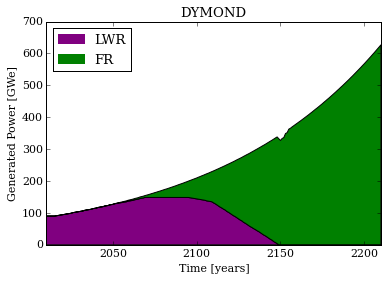

In [25]:
gwe_plot(t, gwe_lwr_sim0, gwe_fr_sim0, 'DYMOND')

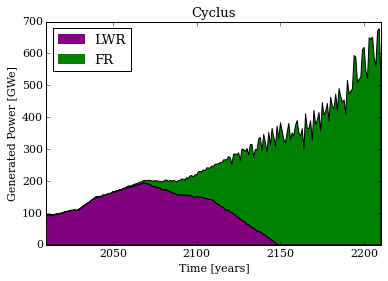

In [26]:
gwe_plot(t, gwe_lwr_sim1, gwe_fr_sim1, 'Cyclus')

Gaussin Process Models
=============
Now let's create gaussian process models across the simulators.

In [27]:
import george
from george.kernels import ExpSquaredKernel

In [28]:
# Set up the Gaussian process.
kernel = ExpSquaredKernel(1.0)
gp = george.GP(kernel)
x = np.concatenate([t]*S)
gp.compute(x, yerr=1e-6, sort=False)

In [29]:
def model(sims, t, gp):
    y = np.concatenate(sims)
    mu, cov = gp.predict(y, t)
    std = np.sqrt(np.diag(cov))
    return mu, std

In [30]:
def model_plot(t, sims, mu, std, title=None):
    fig = plt.figure(figsize=(8, 8))
    ts = np.concatenate([t]*S)
    sims = np.concatenate(sims)
    plt.plot(ts, sims, 'r.', label='simulations')
    plt.plot(t, mu, 'k-', label='model')
    plt.fill_between(t, mu - 2*std, mu + 2*std, color='gray')
    ax = plt.axis()
    plt.axis([t[0], t[-1], 0.0, ax[3]])
    plt.legend(loc=0)
    plt.xlabel('time [year]')
    plt.ylabel('Generated Power [GWe]')
    if title:
        plt.title(title)
    fbase = 'gwe-model-' + (title or '').lower()
    plt.savefig(fbase + '.eps')
    plt.savefig(fbase + '.png')

In [31]:
gwe_lwr_mu, gwe_lwr_std = model([gwe_lwr_sim0, gwe_lwr_sim1], t, gp)

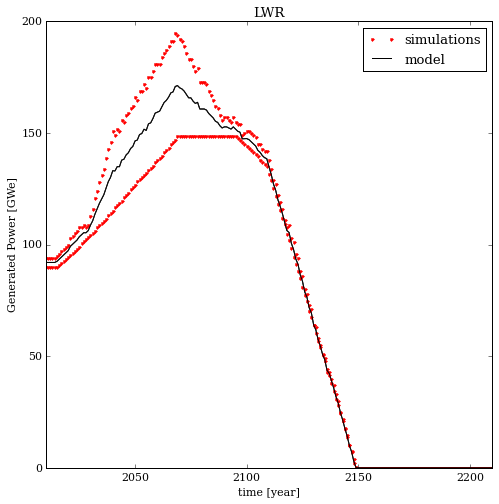

In [32]:
model_plot(t, [gwe_lwr_sim0, gwe_lwr_sim1], gwe_lwr_mu, gwe_lwr_std, title='LWR')

In [33]:
gwe_fr_mu, gwe_fr_std = model([gwe_fr_sim0, gwe_fr_sim1], t, gp)

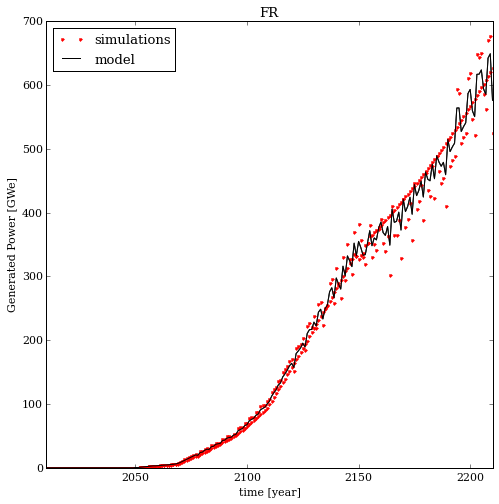

In [34]:
model_plot(t, [gwe_fr_sim0, gwe_fr_sim1], gwe_fr_mu, gwe_fr_std, title='FR')

In [35]:
gwe_mu, gwe_std = model([gwe_sim0, gwe_sim1], t, gp)

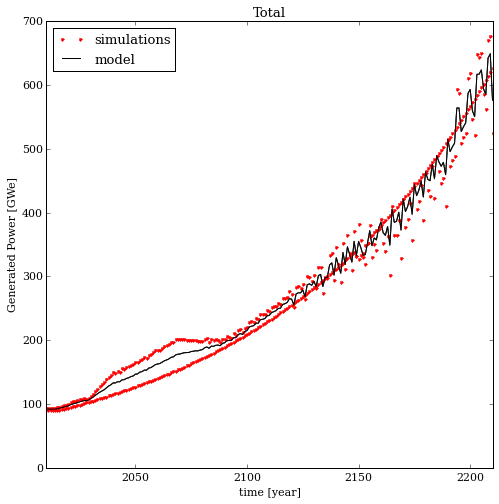

In [36]:
model_plot(t, [gwe_sim0, gwe_sim1], gwe_mu, gwe_std, title='Total')

MFCC
========
Now that we have the Gaussian process models, let's compute the MFCCs so that we can ignore high-frequency components.

In [13]:
import librosa

/home/scopatz/miniconda/lib/python3.5/site-packages/librosa/core/audio.py:37: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


In [14]:
#mfcc = librosa.feature.mfcc(gwe_lwr_mu, n_mfcc=13, hop_length=100).T
mfcc = librosa.feature.mfcc(gwe_lwr_mu, sr=1, n_mfcc=10, n_fft=128, hop_length=1).T

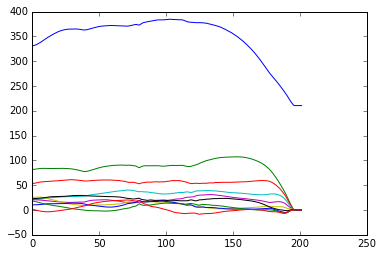

In [15]:
#plt.plot(mfcc[:, :1].sum(axis=1))
plt.plot(mfcc)

In [16]:
n_fft = len(gwe_lwr_mu)
lwr_freq = np.fft.rfft(gwe_lwr_mu, n=n_fft)
low_pass = np.fft.irfft(lwr_freq[:int(n_fft/4)], n=len(t))

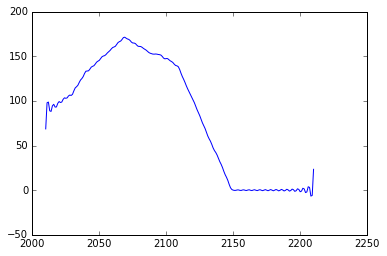

In [17]:
plt.plot(t, low_pass)

Dynamic Time Warpping
============
Now let's sequences to their various components.

In [20]:
import dtw

In [143]:
def contribution(x, dist):
    n = len(x)
    max_cost = dtw.l1(x, np.zeros(n)) / (2*n)
    c = 1.0 - (dist / max_cost)
    return c

def contribution_alt(x, dist):
    n = x.shape
    max_cost = dtw.l1(x, np.zeros(n)) / np.sum(n)
    c = 1.0 - (dist / max_cost)
    return c

def contribution_over_time(x, cost):
    two_n = 2*np.arange(1, len(x)+1) 
    dists = np.diagonal(cost) / two_n
    max_costs = np.fromiter((dtw.l1(x[:i], np.zeros(i))/two_n[i-1] for i in range(1, len(x)+1)), 
                            dtype='f8', count=len(x))
    conts = 1.0 - (dists/max_costs)
    return conts

def display_dwt(dist, cost, path):
    plt.imshow(cost.T, cmap='viridis')
    plt.plot(path[0], path[1], 'r-')
    plt.axis([0, path[0][-1], 0, path[1][-1]])
    print('Distance is ', dist)

In [144]:
dist, cost, path = dtw.dtw(gwe_mu[:,np.newaxis], gwe_lwr_mu[:,np.newaxis])
cont = contribution(gwe_mu, dist)
print('Contribution is', cont)
cont_lwr_t = contribution_over_time(gwe_mu, cost)

Contribution is 0.298920174409


Distance is  96.9024420344


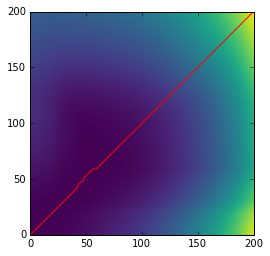

In [145]:
display_dwt(dist, cost, path)

In [146]:
dist, cost, path = dtw.dtw(gwe_mu[:,np.newaxis], gwe_fr_mu[:,np.newaxis])
cont = contribution(gwe_mu, dist)
print('Contribution is', cont)
cont_fr_t = contribution_over_time(gwe_mu, cost)

Contribution is 0.860901283282


Distance is  19.2260636262


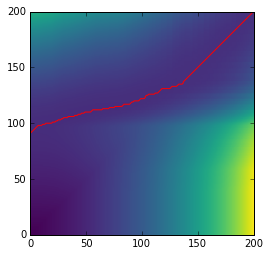

In [147]:
display_dwt(dist, cost, path)

In [148]:
dist, cost, path = dtw.dtw(gwe_mu[:,np.newaxis], gwe_mu[:,np.newaxis])
cont = contribution(gwe_mu, dist)
print('Contribution is', cont)

Contribution is 1.0


Distance is  1.72565261211e-312


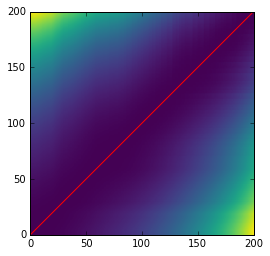

In [149]:
display_dwt(dist, cost, path)

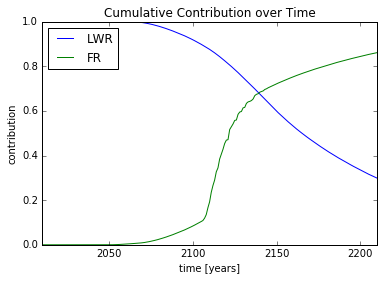

In [150]:
plt.plot(t, cont_lwr_t, label='LWR')
plt.plot(t, cont_fr_t, label='FR')
plt.axis([t[0], t[-1], 0.0, 1.0])
plt.xlabel('time [years]')
plt.ylabel('contribution')
plt.legend(loc=0)
plt.title('Cumulative Contribution over Time')

In [151]:
dist, cost, path = dtw.dtw(gwe_lwr_mu[:,np.newaxis], gwe_lwr_sim0[:, np.newaxis])

Distance is  1.43327129412


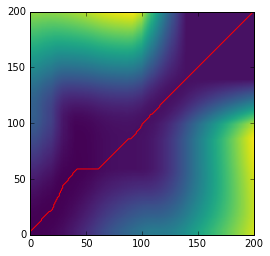

In [152]:
display_dwt(dist, cost, path)

In [153]:
dist, cost, path = dtw.dtw(gwe_lwr_mu[:,np.newaxis], gwe_lwr_sim1[:, np.newaxis])

Distance is  1.13055766652


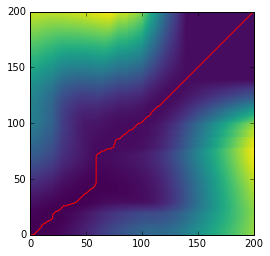

In [154]:
display_dwt(dist, cost, path)

In [155]:
mfcc_lwr = librosa.feature.mfcc(gwe_lwr_mu, sr=1, n_mfcc=10, n_fft=128, hop_length=1).T
mfcc_tot = librosa.feature.mfcc(gwe_mu, sr=1, n_mfcc=10, n_fft=128, hop_length=1).T
dist, cost, path = dtw.dtw(mfcc_tot, mfcc_lwr)
cont = contribution_alt(mfcc_tot, dist)
print('Contribution is', cont)

Contribution is 0.62996937996


Distance is  187.958494761


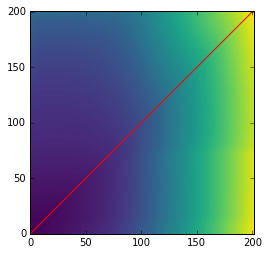

In [156]:
display_dwt(dist, cost, path)

In [157]:
mfcc_fr = librosa.feature.mfcc(gwe_fr_mu, sr=1, n_mfcc=10, n_fft=128, hop_length=1).T
dist, cost, path = dtw.dtw(mfcc_tot, mfcc_fr)
cont = contribution_alt(mfcc_tot, dist)
print('Contribution is', cont)

Contribution is 0.938263139916


Distance is  31.359478552


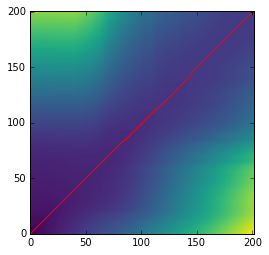

In [158]:
display_dwt(dist, cost, path)